In [169]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_file = os.path.join("./city_data.csv")
ride_file = os.path.join("./ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_file)
ride_data_df = pd.read_csv(ride_file)

#city_data_df.head()
#ride_data_df.head()

#drop duplicates
city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


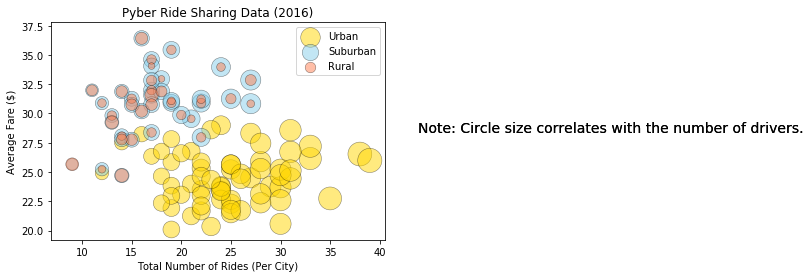

In [173]:
 # Obtain the x and y coordinates for each of the three city types
urban_ride = pyber_df.loc[(pyber_df["type"] == "Urban")]
suburban_ride = pyber_df.loc[(pyber_df["type"] == "Suburban")]
rural_ride = pyber_df.loc[(pyber_df["type"] == "Rural")]

#Calculate average fare, total rides and total drivers
average_fare_suburban = suburban_ride.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban_ride.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban_ride.groupby(['city'])['driver_count'].value_counts()

average_fare_rural = rural_ride.groupby(['city'])['fare'].mean()
total_rides_rural = rural_ride.groupby(['city']).count()['ride_id']
total_drivers_rural = rural_ride.groupby(['city'])['driver_count'].value_counts()

average_fare_urban = urban_ride.groupby(['city'])['fare'].mean()
total_rides_urban = urban_ride.groupby(['city']).count()['ride_id']
total_drivers_urban = urban_ride.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types

urban_scatter = plt.scatter(total_rides_urban, average_fare_urban, marker="o", facecolors="gold", edgecolors="black", linewidths = 0.5, s = total_drivers_urban*15, alpha = 0.5, label="Urban")

suburban_scatter = plt.scatter(total_rides_suburban, average_fare_suburban, marker="o", facecolors="skyblue", edgecolors="black", linewidths = 0.5, s = total_drivers_suburban*15, alpha = 0.5, label="Suburban",)

rural_scatter = plt.scatter(total_rides_suburban, average_fare_suburban, marker="o", facecolors="coral", edgecolors="black", linewidths = 0.5, s = total_drivers_rural*15, alpha = 0.5, label = "Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel ("Average Fare ($)")

# Create a legend
plt.legend(loc='best')

# Incorporate a text label regarding circle size

textstr = "Note: Circle size correlates with the number of drivers."
plt.text(0.975, 0.5, textstr, fontsize=14, transform=plt.gcf().transFigure)
plt.gcf().text(0.975, 0.5, textstr, fontsize=14)

# Save Figure
plt.savefig("./RideShare2016.png")

In [ ]:
# Show plot
plt.show()

In [ ]:
# Calculate Type Percents
total_fare = pyber_df.groupby(['type'])['fare'].sum()
total_fare

In [ ]:
total_fare.index

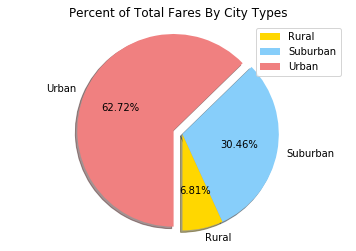

In [174]:
# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Percent of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%",shadow=True, startangle=270)
plt.axis("equal")
plt.legend(loc = "best")

# Save Figure
plt.savefig("./TypePercents.png")
# Show Figure
plt.show()

In [ ]:
# Calculate Ride Percents
rides_pie = pyber_df.groupby(["type"])["ride_id"].count()
rides_pie

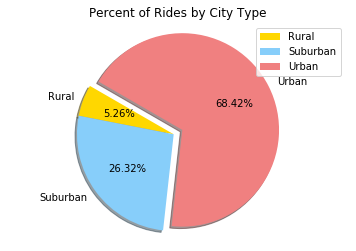

In [175]:
# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Percent of Rides by City Type")
plt.pie(rides_pie, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%",shadow=True, startangle=150)
plt.axis("equal")
plt.legend(loc = "best")
# Save Figure
plt.savefig("./RideSharePie.png")

In [ ]:
# Show Figure
plt.show()

In [ ]:
# Calculate Driver Percents
drivers_pie = pyber_df.groupby(["type"])["driver_count"].mean()
drivers_pie

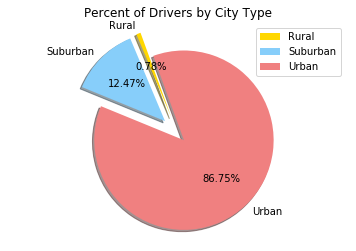

In [176]:
# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0.2, 0.2, 0.1)
plt.title("Percent of Drivers by City Type")
plt.pie(drivers_pie, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%",shadow=True, startangle=110)
plt.axis("equal")
plt.legend(loc = "best")
# Save Figure
plt.savefig("./RideShareDriverPie.png")
# Show Figure
plt.show()